In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [2]:
df_half_hour=pd.read_csv('SDL.csv')
df_half_hour.isna().sum()

valid        0
tmpf       130
dwpf       135
relh       181
drct     14394
sknt      3940
alti        29
mslp      4661
vsby       273
dtype: int64

In [3]:
filter_df=df_half_hour
filter_df

,valid,tmpf,dwpf,relh,drct,sknt,alti,mslp,vsby
0,1/1/2010 0:53,58.0,20.0,22.61,0.0,0.0,30.30,1025.4,10.0
1,1/1/2010 1:53,54.0,22.0,28.39,30.0,3.0,30.31,1025.8,10.0
2,1/1/2010 2:53,52.0,23.0,31.96,0.0,0.0,30.32,1026.2,10.0
3,1/1/2010 3:53,49.0,23.0,35.80,0.0,0.0,30.33,1026.4,10.0
4,1/1/2010 4:53,46.0,25.0,43.34,0.0,0.0,30.33,1026.6,10.0
...,...,...,...,...,...,...,...,...,...
134007,10/20/2024 19:53,75.0,36.0,24.20,NaN,5.0,30.15,1019.4,10.0
134008,10/20/2024 20:53,76.0,37.0,24.35,190.0,5.0,30.13,1018.7,10.0
134009,10/20/2024 21:53,79.0,37.0,22.05,0.0,0.0,30.12,1018.3,10.0
134010,10/20/2024 22:53,78.0,37.0,22.79,260.0,4.0,30.10,1017.8,10.0


In [4]:
# Ensure the 'valid' column is in datetime format
filter_df['valid'] = pd.to_datetime(filter_df['valid'])

# Add a 'date' column for easier grouping
filter_df['date'] = filter_df['valid'].dt.date

# Find rows with the maximum temperature for each day
daily_max_temp = filter_df.loc[filter_df.groupby('date')['tmpf'].idxmax()].reset_index(drop=True)

# Inspect the result
daily_max_temp.drop(columns=['valid'],inplace=True)
daily_max_temp


,tmpf,dwpf,relh,drct,sknt,alti,mslp,vsby,date
0,67.0,14.0,12.74,NaN,3.0,30.14,1019.7,10.0,2010-01-01
1,69.0,26.0,19.77,310.0,5.0,30.03,1015.7,10.0,2010-01-02
2,71.0,23.0,16.26,0.0,0.0,30.07,1017.3,10.0,2010-01-03
3,72.0,21.0,14.51,120.0,6.0,30.07,1017.2,10.0,2010-01-04
4,71.0,25.0,17.67,240.0,4.0,30.05,1016.3,10.0,2010-01-05
...,...,...,...,...,...,...,...,...,...
5402,94.0,39.0,14.78,180.0,7.0,29.81,1006.8,10.0,2024-10-16
5403,90.0,38.0,16.10,270.0,6.0,29.78,1006.2,10.0,2024-10-17
5404,83.0,47.0,28.45,250.0,3.0,29.71,1003.7,10.0,2024-10-18
5405,69.0,37.0,30.84,140.0,4.0,30.06,1016.3,10.0,2024-10-19


In [5]:
daily_max_temp['temp_c'] = (daily_max_temp['tmpf'] - 32) * 5/9

# Drop the old column if needed
daily_max_temp.drop(columns=['tmpf'], inplace=True)

daily_max_temp

,dwpf,relh,drct,sknt,alti,mslp,vsby,date,temp_c
0,14.0,12.74,NaN,3.0,30.14,1019.7,10.0,2010-01-01,19.444444
1,26.0,19.77,310.0,5.0,30.03,1015.7,10.0,2010-01-02,20.555556
2,23.0,16.26,0.0,0.0,30.07,1017.3,10.0,2010-01-03,21.666667
3,21.0,14.51,120.0,6.0,30.07,1017.2,10.0,2010-01-04,22.222222
4,25.0,17.67,240.0,4.0,30.05,1016.3,10.0,2010-01-05,21.666667
...,...,...,...,...,...,...,...,...,...
5402,39.0,14.78,180.0,7.0,29.81,1006.8,10.0,2024-10-16,34.444444
5403,38.0,16.10,270.0,6.0,29.78,1006.2,10.0,2024-10-17,32.222222
5404,47.0,28.45,250.0,3.0,29.71,1003.7,10.0,2024-10-18,28.333333
5405,37.0,30.84,140.0,4.0,30.06,1016.3,10.0,2024-10-19,20.555556


In [6]:
percentile_90 = np.percentile(daily_max_temp['temp_c'], 90)
print(f"90th Percentile of max_temp_c: {percentile_90}")
daily_max_temp

90th Percentile of max_temp_c: 41.111111111111114


,dwpf,relh,drct,sknt,alti,mslp,vsby,date,temp_c
0,14.0,12.74,NaN,3.0,30.14,1019.7,10.0,2010-01-01,19.444444
1,26.0,19.77,310.0,5.0,30.03,1015.7,10.0,2010-01-02,20.555556
2,23.0,16.26,0.0,0.0,30.07,1017.3,10.0,2010-01-03,21.666667
3,21.0,14.51,120.0,6.0,30.07,1017.2,10.0,2010-01-04,22.222222
4,25.0,17.67,240.0,4.0,30.05,1016.3,10.0,2010-01-05,21.666667
...,...,...,...,...,...,...,...,...,...
5402,39.0,14.78,180.0,7.0,29.81,1006.8,10.0,2024-10-16,34.444444
5403,38.0,16.10,270.0,6.0,29.78,1006.2,10.0,2024-10-17,32.222222
5404,47.0,28.45,250.0,3.0,29.71,1003.7,10.0,2024-10-18,28.333333
5405,37.0,30.84,140.0,4.0,30.06,1016.3,10.0,2024-10-19,20.555556


In [7]:
daily_max_temp.isna().sum()

dwpf        0
relh        1
drct      964
sknt      139
alti        2
mslp       47
vsby        6
date        0
temp_c      0
dtype: int64

In [8]:
daily_max_temp = daily_max_temp.ffill() 
daily_max_temp.isna().sum()

dwpf      0
relh      0
drct      1
sknt      0
alti      0
mslp      0
vsby      0
date      0
temp_c    0
dtype: int64

In [9]:
daily_max_temp['date'] = pd.to_datetime(daily_max_temp['date'])

daily_max_temp = daily_max_temp[(daily_max_temp['date'] >= pd.to_datetime('2010-01-01')) & (daily_max_temp['date'] <= pd.to_datetime('2024-10-21'))]

daily_max_temp

,dwpf,relh,drct,sknt,alti,mslp,vsby,date,temp_c
0,14.0,12.74,NaN,3.0,30.14,1019.7,10.0,2010-01-01,19.444444
1,26.0,19.77,310.0,5.0,30.03,1015.7,10.0,2010-01-02,20.555556
2,23.0,16.26,0.0,0.0,30.07,1017.3,10.0,2010-01-03,21.666667
3,21.0,14.51,120.0,6.0,30.07,1017.2,10.0,2010-01-04,22.222222
4,25.0,17.67,240.0,4.0,30.05,1016.3,10.0,2010-01-05,21.666667
...,...,...,...,...,...,...,...,...,...
5402,39.0,14.78,180.0,7.0,29.81,1006.8,10.0,2024-10-16,34.444444
5403,38.0,16.10,270.0,6.0,29.78,1006.2,10.0,2024-10-17,32.222222
5404,47.0,28.45,250.0,3.0,29.71,1003.7,10.0,2024-10-18,28.333333
5405,37.0,30.84,140.0,4.0,30.06,1016.3,10.0,2024-10-19,20.555556


In [10]:
df=daily_max_temp

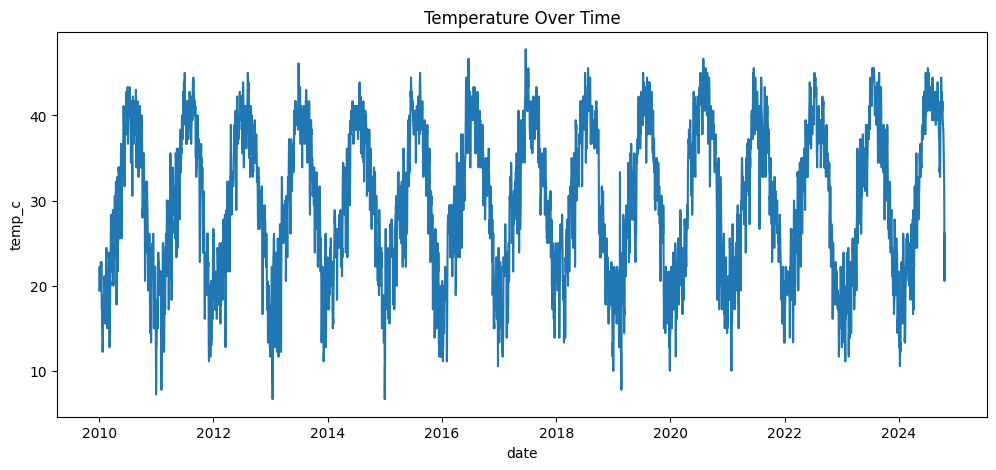

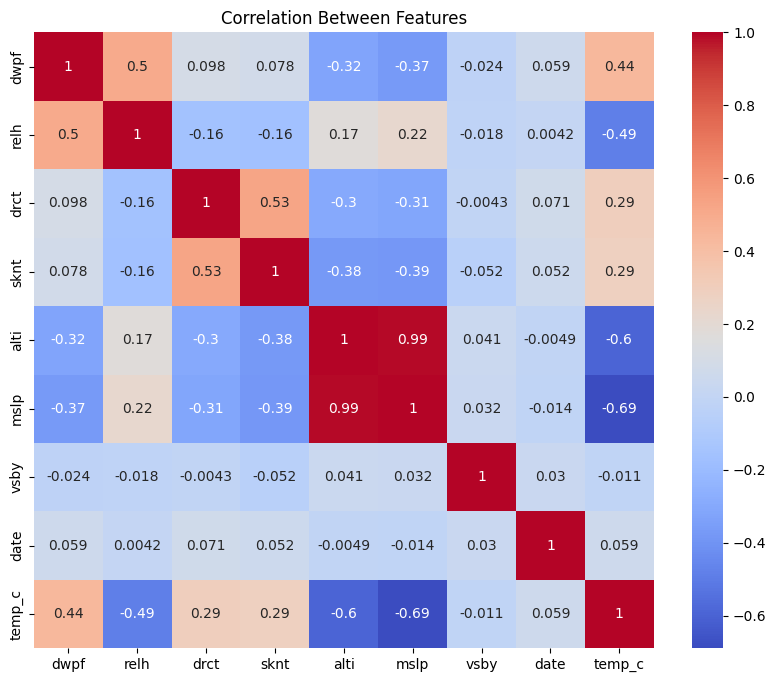

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Temperature trend
plt.figure(figsize=(12, 5))
sns.lineplot(x='date', y='temp_c', data=df)
plt.title("Temperature Over Time")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Features")
plt.show()


In [12]:
# Convert date column
df['date'] = pd.to_datetime(df['date'])

# Create useful time columns
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['year'] = df['date'].dt.year
df['hour'] = df['date'].dt.hour

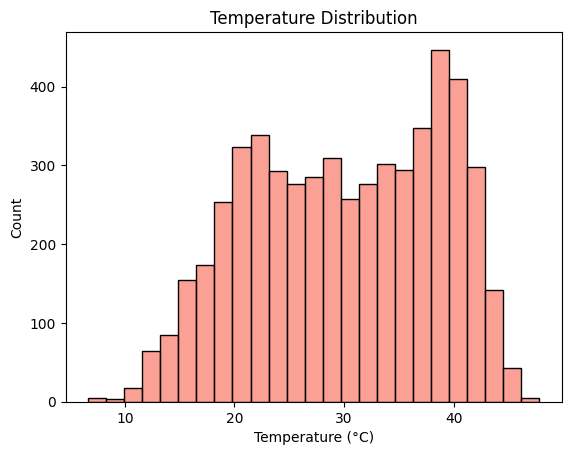

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assume df is your DataFrame and 'temp_c' is the temperature column
sns.histplot(data=df, x='temp_c', kde=False, color='salmon', edgecolor='black')

plt.title("Temperature Distribution")
plt.xlabel("Temperature (°C)")
plt.ylabel("Count")
plt.show()


C:\Users\muham\AppData\Local\Temp\ipykernel_16988\2633976979.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='month', y='temp_c', data=monthly_temp, palette='Oranges')


Text(0, 0.5, 'Temperature (°C)')

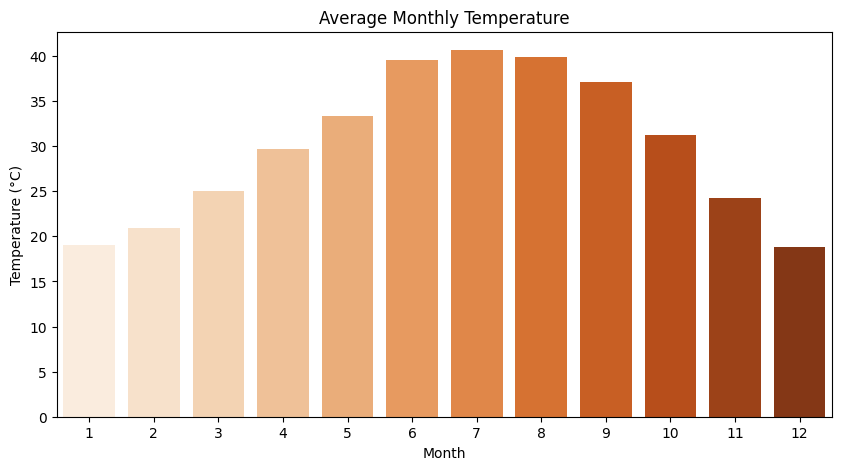

In [14]:
monthly_temp = df.groupby('month')['temp_c'].mean().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(x='month', y='temp_c', data=monthly_temp, palette='Oranges')
plt.title("Average Monthly Temperature")
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")


Text(0.5, 1.0, 'Average Maximum Temperature (°C) Month')

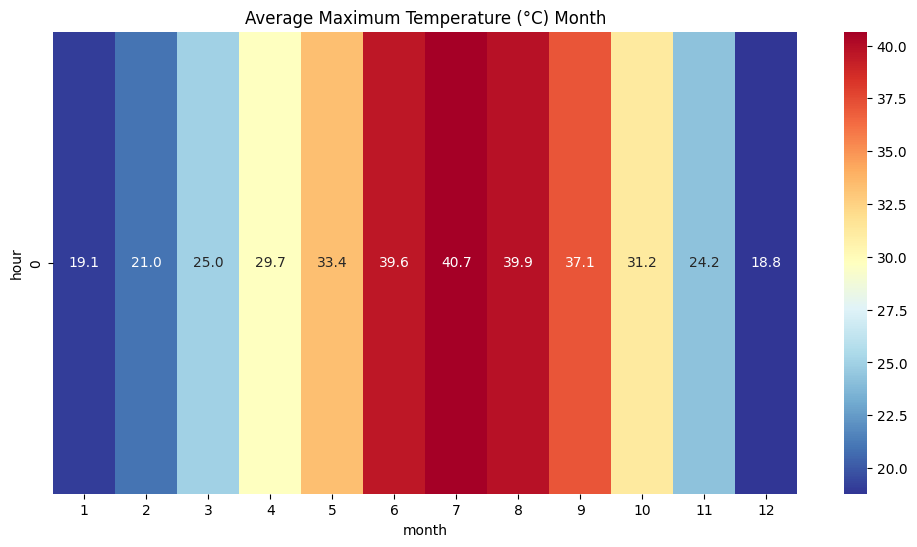

In [15]:
pivot_table = df.pivot_table(index='hour', columns='month', values='temp_c', aggfunc='mean')
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap="RdYlBu_r", annot=True, fmt=".1f")
plt.title("Average Maximum Temperature (°C) Month")

Number of days with large temperature change (> 5°C): 174


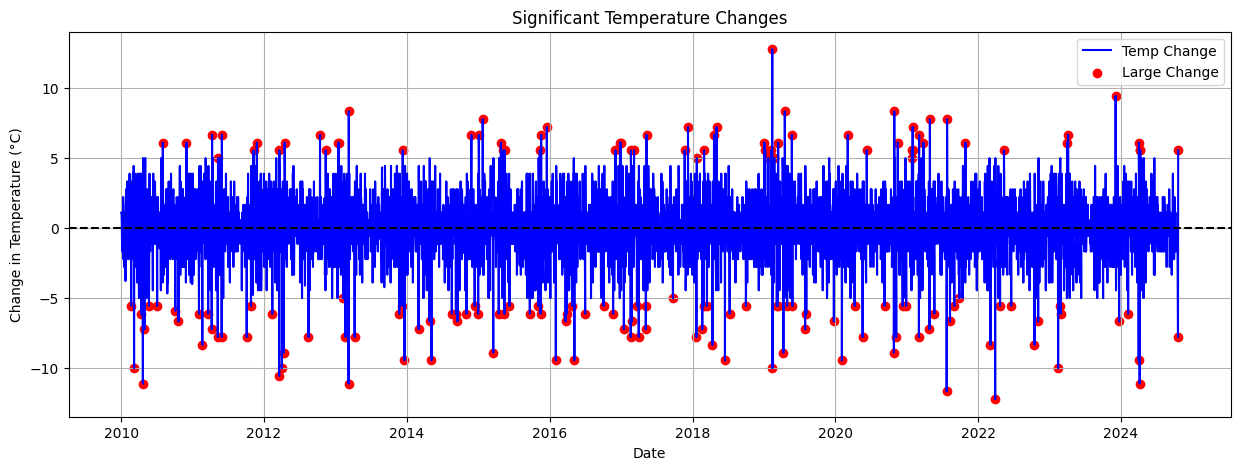

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Calculate daily temperature change
df['temp_change'] = df['temp_c'].diff()

# Define threshold, e.g., >5°C change
threshold = 5

# Filter days with large absolute temperature change
large_change = df[np.abs(df['temp_change']) > threshold]

# Print number of large change days
print("Number of days with large temperature change (> 5°C):", len(large_change))

# Plotting
plt.figure(figsize=(15, 5))
plt.plot(df['date'], df['temp_change'], label="Temp Change", color='blue')
plt.scatter(large_change['date'], large_change['temp_change'], color='red', label='Large Change')
plt.axhline(0, color='black', linestyle='--')
plt.title("Significant Temperature Changes")
plt.xlabel("Date")
plt.ylabel("Change in Temperature (°C)")
plt.legend()
plt.grid(True)
plt.show()
